In [1]:
!pip install tensorflow
!pip install imbalanced-learn

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp39-cp39-win_amd64.whl.metadata (6.8 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl.metadata (14 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached charset_normalizer-3.3.2-cp39-cp39-win_amd64.whl.metadata (34

  You can safely remove it manually.
  You can safely remove it manually.


  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.5.1-cp39-cp39-win_amd64.whl.metadata (12 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scikit_learn-1.5.1-cp39-cp39-win_amd64.whl (11.0 MB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
# Import the CSV files
df_train = pd.read_csv('./outputs/preprocessed_data/train_data.csv')
df_test = pd.read_csv('./outputs/preprocessed_data/test_data.csv')

In [23]:
# Separate features and target variable from df_train
X = df_train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = df_train['TARGET']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_val_scaled = scaler.transform(X_val)

# Ensure df_test has the same columns as X_train
df_test_aligned = df_test[X_train.columns]

# Transform the test data
X_test_scaled = scaler.transform(df_test_aligned)

In [24]:
# Define the SMOTE sampler
smote = SMOTE(sampling_strategy=0.5, k_neighbors=10,
              random_state=42, n_jobs=-1)
# Fit the sampler to balance the training data
X_train_balanced, y_train_balanced = smote.fit_resample(
    X_train_scaled, y_train)

c:\Work\Home Credit Default Risk\.venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [25]:
model = Sequential()
model.add(Dense(512, input_dim=X_train_balanced.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Work\Home Credit Default Risk\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Compile the model with class weights
# class_weights = {0: 1., 1: 10.}  # Adjust the weights as needed


# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Define early stopping

early_stopping = EarlyStopping(
monitor='val_loss', patience=5, restore_best_weights=True)

In [27]:
history = model.fit(X_train_balanced, y_train_balanced, validation_data=(
    X_val_scaled, y_val), epochs=100, batch_size=256, callbacks=[early_stopping])

Epoch 1/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.6497 - loss: 0.6509 - val_accuracy: 0.6151 - val_loss: 0.5733
Epoch 2/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6877 - loss: 0.5882 - val_accuracy: 0.7375 - val_loss: 0.4863
Epoch 3/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7001 - loss: 0.5737 - val_accuracy: 0.7485 - val_loss: 0.4884
Epoch 4/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7074 - loss: 0.5642 - val_accuracy: 0.7603 - val_loss: 0.4645
Epoch 5/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7174 - loss: 0.5542 - val_accuracy: 0.7601 - val_loss: 0.4684
Epoch 6/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7237 - loss: 0.5484 - val_accuracy: 0.7437 - val_loss: 0.4765
Epoch 7/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7273 - loss: 0.5451 - val_accuracy: 0.7783 - val_loss: 0.4423
Epoch 8/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7313 - loss: 0.537

In [28]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print(f'Validation Accuracy: {val_accuracy}')


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8421 - loss: 0.3781
Validation Accuracy: 0.8440165519714355


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


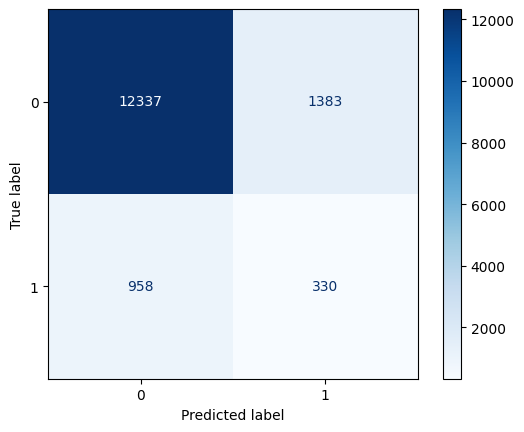

In [29]:
# Predict on the validation set
y_val_pred = model.predict(X_val_scaled).round().astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [30]:
# Print classification report
print(classification_report(y_val, y_val_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_val, y_val_pred)
print(f'ROC-AUC Score: {roc_auc}')

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     13720
           1       0.19      0.26      0.22      1288

    accuracy                           0.84     15008
   macro avg       0.56      0.58      0.57     15008
weighted avg       0.86      0.84      0.85     15008

ROC-AUC Score: 0.5777047154265432


In [31]:
# Predict on the test set
df_test['TARGET'] = model.predict(X_test_scaled).round().astype(int)

# Export the predictions to a CSV file
df_test.to_csv('./outputs/enhanced_features_deep_learning/df_test_predictions_deep_learning.csv', index=False)

447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
